In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [86]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [87]:
df["quality"]=df['quality'].astype(float)

In [88]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [89]:
df_visualization_continous = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].copy()

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

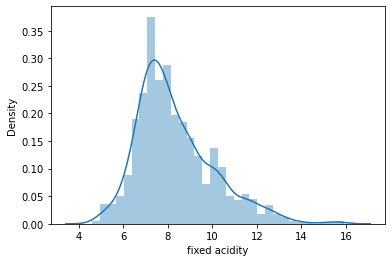

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_visualization_continous['fixed acidity'], kde=True)

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

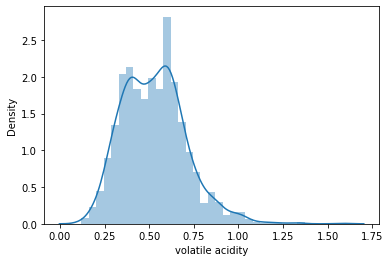

In [91]:
sns.distplot(df_visualization_continous['volatile acidity'], kde=True)

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

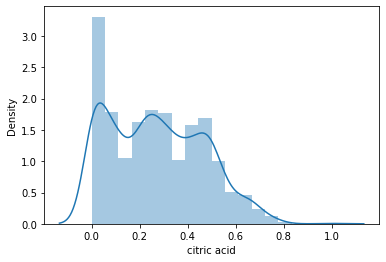

In [92]:
sns.distplot(df_visualization_continous['citric acid'], kde=True)

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

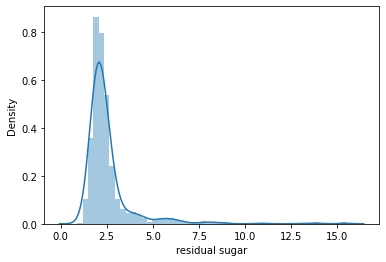

In [93]:
sns.distplot(df_visualization_continous['residual sugar'], kde=True)

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

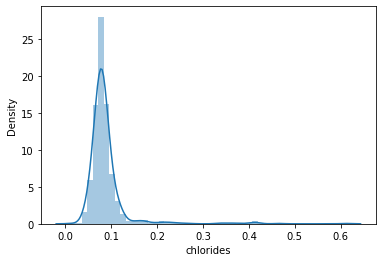

In [94]:
sns.distplot(df_visualization_continous['chlorides'], kde=True)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

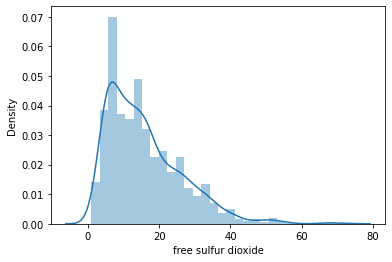

In [95]:
sns.distplot(df_visualization_continous['free sulfur dioxide'], kde=True)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

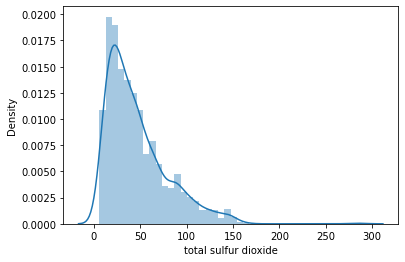

In [96]:
sns.distplot(df_visualization_continous['total sulfur dioxide'], kde=True)

<AxesSubplot:xlabel='density', ylabel='Density'>

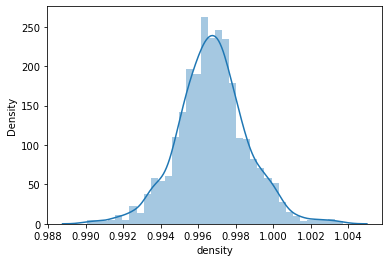

In [97]:
sns.distplot(df_visualization_continous['density'], kde=True)

<AxesSubplot:xlabel='pH', ylabel='Density'>

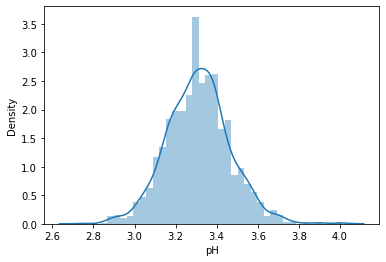

In [98]:
sns.distplot(df_visualization_continous['pH'], kde=True)

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

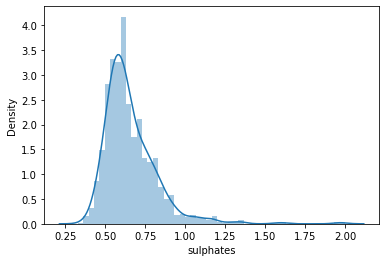

In [99]:
sns.distplot(df_visualization_continous['sulphates'], kde=True)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

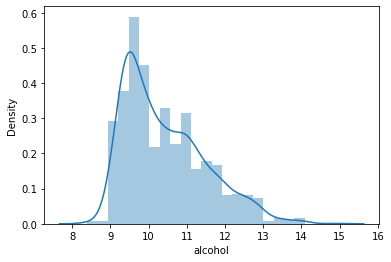

In [100]:
sns.distplot(df_visualization_continous['alcohol'], kde=True)

<AxesSubplot:>

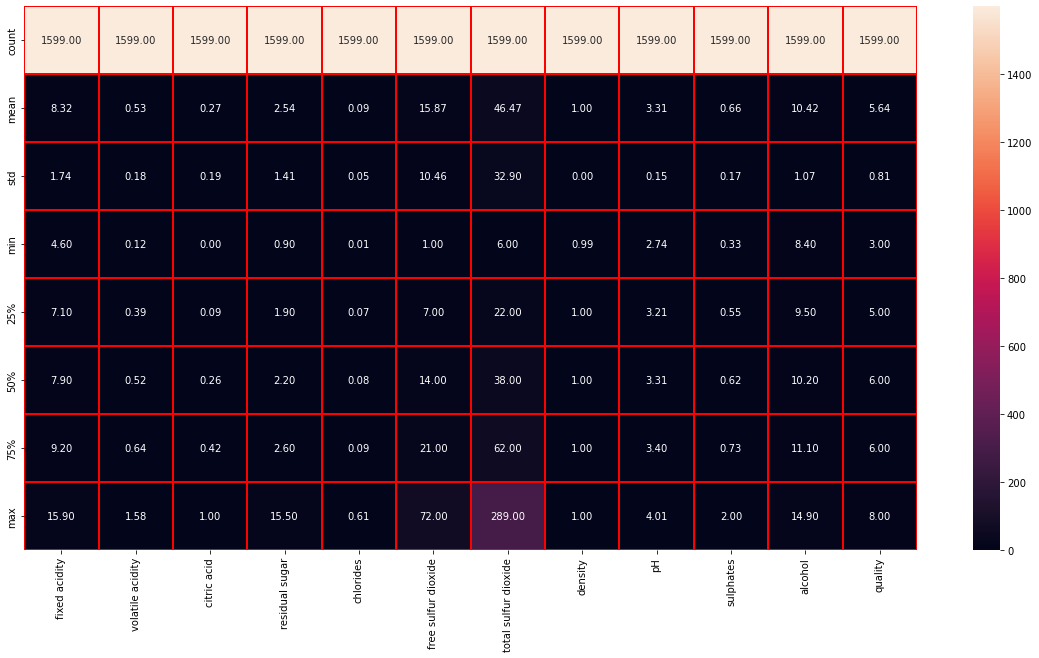

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")


In [102]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [103]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

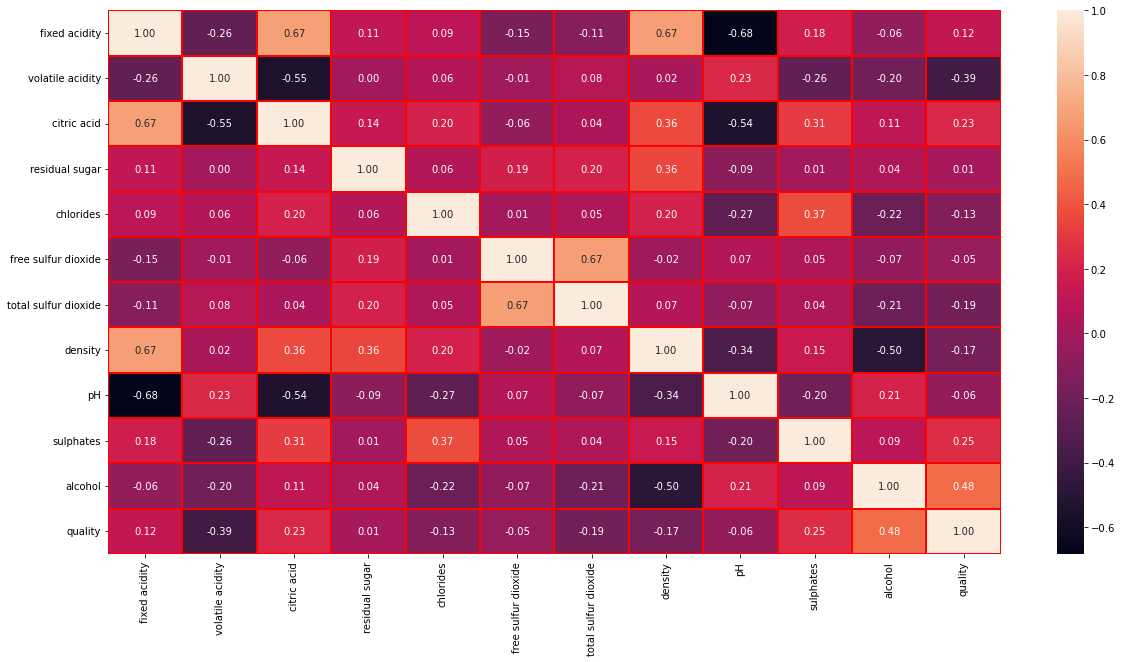

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")


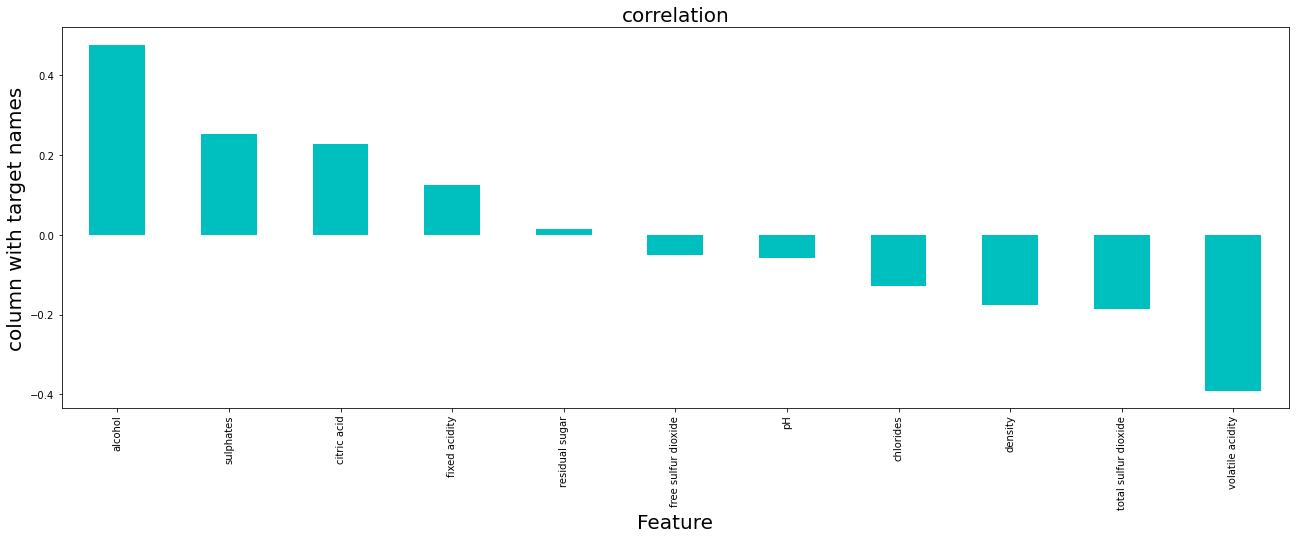

In [105]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar',color = 'c')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('column with target names', fontsize = 20)
plt.title('correlation', fontsize = 20)
plt.show()

In [106]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [107]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

<AxesSubplot:>

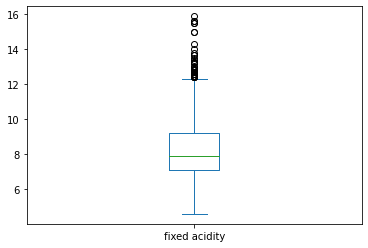

In [108]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

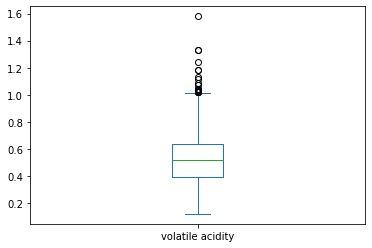

In [109]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

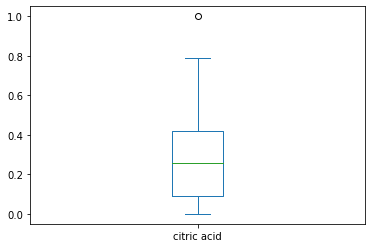

In [110]:
df['citric acid'].plot.box()

<AxesSubplot:>

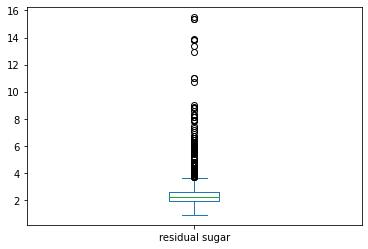

In [111]:
df['residual sugar'].plot.box()

<AxesSubplot:>

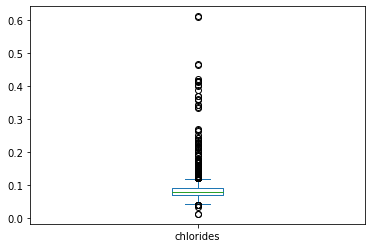

In [112]:
df['chlorides'].plot.box()

<AxesSubplot:>

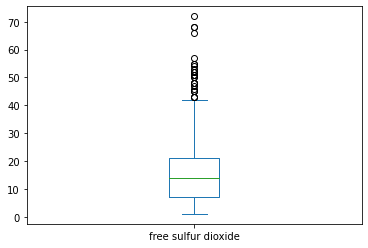

In [113]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

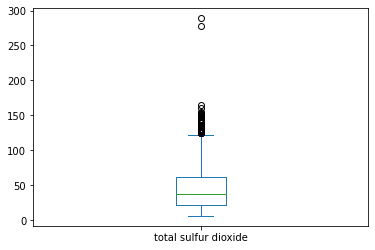

In [114]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

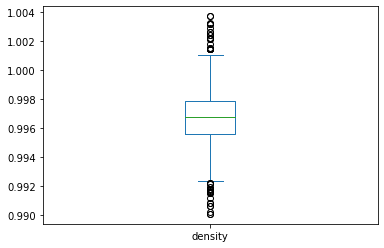

In [115]:
df['density'].plot.box()

<AxesSubplot:>

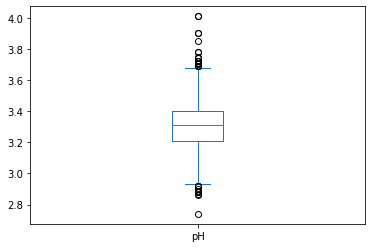

In [116]:
df['pH'].plot.box()

<AxesSubplot:>

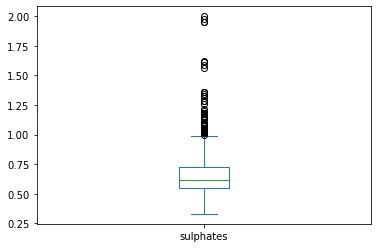

In [117]:
df['sulphates'].plot.box()

<AxesSubplot:>

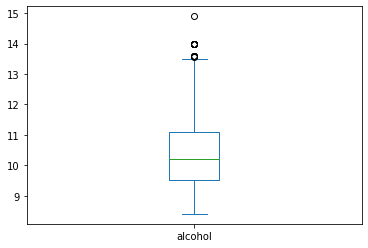

In [118]:
df['alcohol'].plot.box()

<AxesSubplot:>

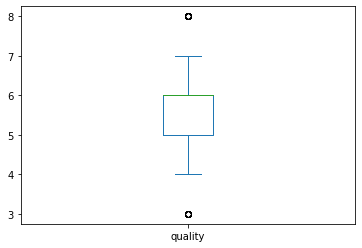

In [119]:
df['quality'].plot.box()

In [120]:
df.shape

(1599, 12)

In [121]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [122]:
x = df.drop("quality",axis=1)
y = df["quality"]

In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [147]:
for i in range(0,80):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")
    

At random state 0, the training accuracy is:- 0.36545196162068616
At random state 0, the training accuracy is:- 0.3283887639580211


At random state 1, the training accuracy is:- 0.36558499214790374
At random state 1, the training accuracy is:- 0.3266402726986821


At random state 2, the training accuracy is:- 0.37079770098666653
At random state 2, the training accuracy is:- 0.3024388697391549


At random state 3, the training accuracy is:- 0.3530297271672961
At random state 3, the training accuracy is:- 0.3869039632632534


At random state 4, the training accuracy is:- 0.36362946599677426
At random state 4, the training accuracy is:- 0.3369500251369846


At random state 5, the training accuracy is:- 0.3536087659821445
At random state 5, the training accuracy is:- 0.37874687431635423


At random state 6, the training accuracy is:- 0.3517392094319982
At random state 6, the training accuracy is:- 0.38947421901084534


At random state 7, the training accuracy is:- 0.35997491908932233
At r

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)


In [149]:
lr.fit(x_train,y_train)

LinearRegression()

In [144]:
pred_test=lr.predict(x_test)

In [145]:
print(r2_score(y_test,pred_test))

0.3588548729210793


In [150]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)


In [160]:
from sklearn.model_selection import cross_val_score
for j in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.2848257660293065 and accuracy score for training is -0.3519456681913091 and accuracy for the testing is -0.35617028426235886


At cross fold 3 the cv score is 0.31157457784247994 and accuracy score for training is -0.3519456681913091 and accuracy for the testing is -0.35617028426235886


At cross fold 4 the cv score is 0.2871973003054054 and accuracy score for training is -0.3519456681913091 and accuracy for the testing is -0.35617028426235886


At cross fold 5 the cv score is 0.2900416288421945 and accuracy score for training is -0.3519456681913091 and accuracy for the testing is -0.35617028426235886


At cross fold 6 the cv score is 0.2345495739383002 and accuracy score for training is -0.3519456681913091 and accuracy for the testing is -0.35617028426235886


At cross fold 7 the cv score is 0.2494734974214478 and accuracy score for training is -0.3519456681913091 and accuracy for the testing is -0.35617028426235886


At cross fold 8 the cv score is 0

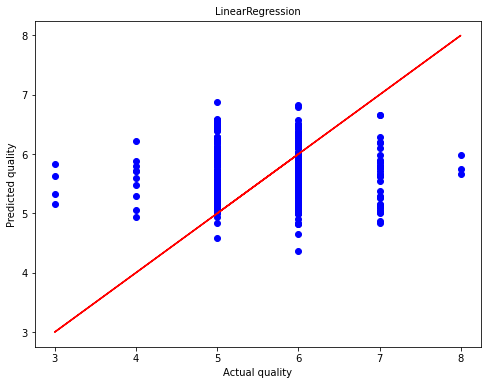

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual quality',fontsize=10)
plt.ylabel('Predicted quality',fontsize=10)
plt.title('LinearRegression',fontsize=10)
plt.show()

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [233]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, 1,10],'random_state':list(range(0,10))}
ls = Lasso() 
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [234]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.04323210498211394

In [239]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.04199448981808844

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [280]:
rf = RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test, pred_decision)
print('R2 score:', rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross val Score:', rfc*100)

R2 score: 44.83940909893474
Cross val Score: 32.431794129093504


In [ ]:
filename = "redwine.pkl"
pickle.dump(rf,open(filename, 'wb'))